In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [3]:
# Read in file 
data = pd.read_csv("../data/curated/outliers_removed.csv")

In [4]:
# Split features and predict results
y = data['Weekly Rental Price']
x = data[['Postcode','Baths', 'Population', 'Count_School', 'Count_Station', 'Bedrooms']]

# Processed X into value between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [5]:
# Split the data set into training/testing and validation sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [6]:
# Create model and train the model
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
])

model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

2022-10-03 16:53:28.777159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
797/797 [==============================] - 3s 3ms/step - loss: 10.0186 - msle: 9.2619 - val_loss: 2.9455 - val_msle: 1.7307
Epoch 2/100
797/797 [==============================] - 2s 2ms/step - loss: 2.3047 - msle: 0.9773 - val_loss: 1.8261 - val_msle: 0.4950
Epoch 3/100
797/797 [==============================] - 2s 2ms/step - loss: 1.5771 - msle: 0.3944 - val_loss: 1.3564 - val_msle: 0.3090
Epoch 4/100
797/797 [==============================] - 2s 3ms/step - loss: 1.2326 - msle: 0.2736 - val_loss: 1.1100 - val_msle: 0.2246
Epoch 5/100
797/797 [==============================] - 2s 3ms/step - loss: 1.0262 - msle: 0.2137 - val_loss: 0.9384 - val_msle: 0.1929
Epoch 6/100
797/797 [==============================] - 2s 2ms/step - loss: 0.8840 - msle: 0.1829 - val_loss: 0.8214 - val_msle: 0.1668
Epoch 7/100
797/797 [==============================] - 2s 2ms/step - loss: 0.7823 - msle: 0.1636 - val_loss: 0.7335 - val_msle: 0.1503
Epoch 8/100
797/797 [==============================] -

171/171 [==============================] - 0s 1ms/step - loss: 0.0943 - msle: 0.0717


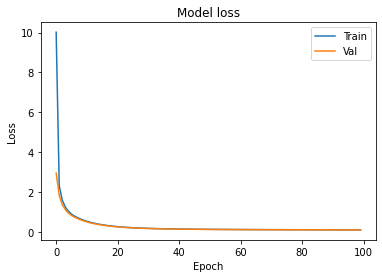

In [7]:
# Do the model evaluation
model.evaluate(X_test, Y_test)[1]

# Plot the model performance
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

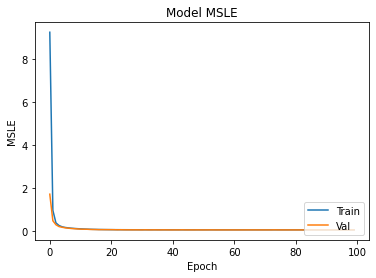

In [8]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
# Predict the va;idation set
prediction = model.predict(X_val)

# Calculate the absolute errors
error = prediction - Y_val[0]
error = [abs(x) for x in error]

# Print out the mean absolute error (mae)
np.mean(error)

171/171 [==============================] - 0s 1ms/step


11.813868

In [10]:
# calculate the absolute errors of baseline model
y_mode = mode(Y_val)
baseline_error = [abs(y_mode-x) for x in Y_val]
np.mean(baseline_error)

90.1511234150465

In [11]:
# Update population in 2023/223/2025
pop = pd.read_csv("../data/curated/predicted_population.csv")
post_data = data[['Postcode', 'Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]

pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

pop_2023 = pd.merge(pop_2023, post_data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 = pop_2023[['Postcode', '2023', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis=0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]
pred_2023 = model.predict(pop_2023)
data.insert(6, 'Pred_2023', pred_2023)

pop_2024 = pd.merge(pop_2024, post_data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 = pop_2024[['Postcode', '2024', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = model.predict(pop_2024)
data.insert(7, 'Pred_2024', pred_2024)

pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 = pop_2025[['Postcode', '2025', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = model.predict(pop_2025)
data.insert(8, 'Pred_2025', pred_2025)

1138/1138 [==============================] - 1s 962us/step


In [12]:
# Calculate growth rate
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price'])/data['Weekly Rental Price']
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price'])/data['Weekly Rental Price']
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price'])/data['Weekly Rental Price']
data.drop(columns='Unnamed: 0')
data = data[["Postcode", "Weekly Rental Price", "Pred_2023", "Pred_2024", "Pred_2025", "rate_2023", "rate_2024", "rate_2025"]]


In [17]:
# Group by the data by the postcode
data = data.groupby(by=['Postcode']).mean()
data = data.sort_values(by=['rate_2023'], ascending=False)
data = data.head(10)
data.to_csv("../data/curated/NNpredi.csv")